[To get you in the mood, some Joe Budden-Pump It Up](https://www.youtube.com/watch?v=ySfwW_xSRU4)

# Predicting Water Pump Failures

Credit to:



[Pump it Up](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/)

Predicitng Water Pump Failures in Tanzania

# Importing 

## Libraries

In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb
from xgboost import XGBClassifier

## Data

### Bring in our 3 datasets




In [0]:
train_value = pd.read_csv("train_features.csv")
train_label = pd.read_csv("train_labels.csv")
test = pd.read_csv("test_features.csv")

### Merge our datasets

In [0]:
train_data = train_value.merge(train_label, how = "outer", on = "id", sort = True)

# Exploratory Visualizations

### Histogram

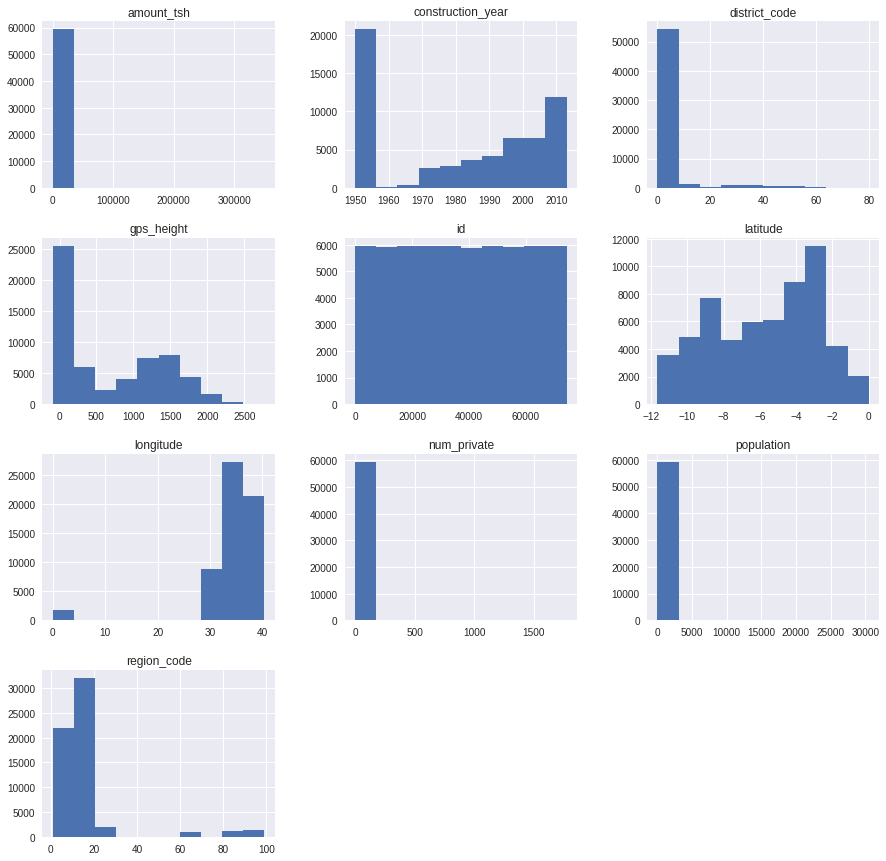

In [0]:
train_data.hist(figsize=(15,15))
plt.show();


### Countplot of Status Group

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


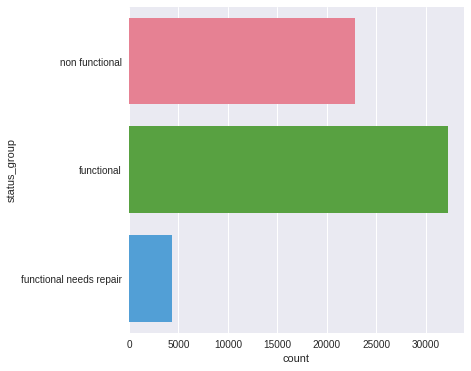

In [0]:
palette=[sns.color_palette()[2],sns.color_palette()[1],sns.color_palette()[0]]
sns.countplot(y='status_group', data=train_data, palette='husl')
plt.show()

### Countplot of Quality Group

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

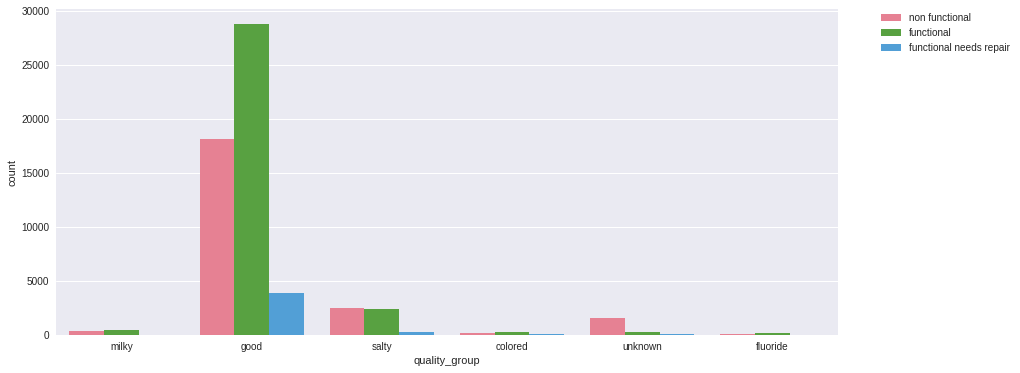

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=train_data,x='quality_group',hue='status_group', palette = 'husl')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train_data.water_quality.value_counts()

### Countplot of Quantity

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


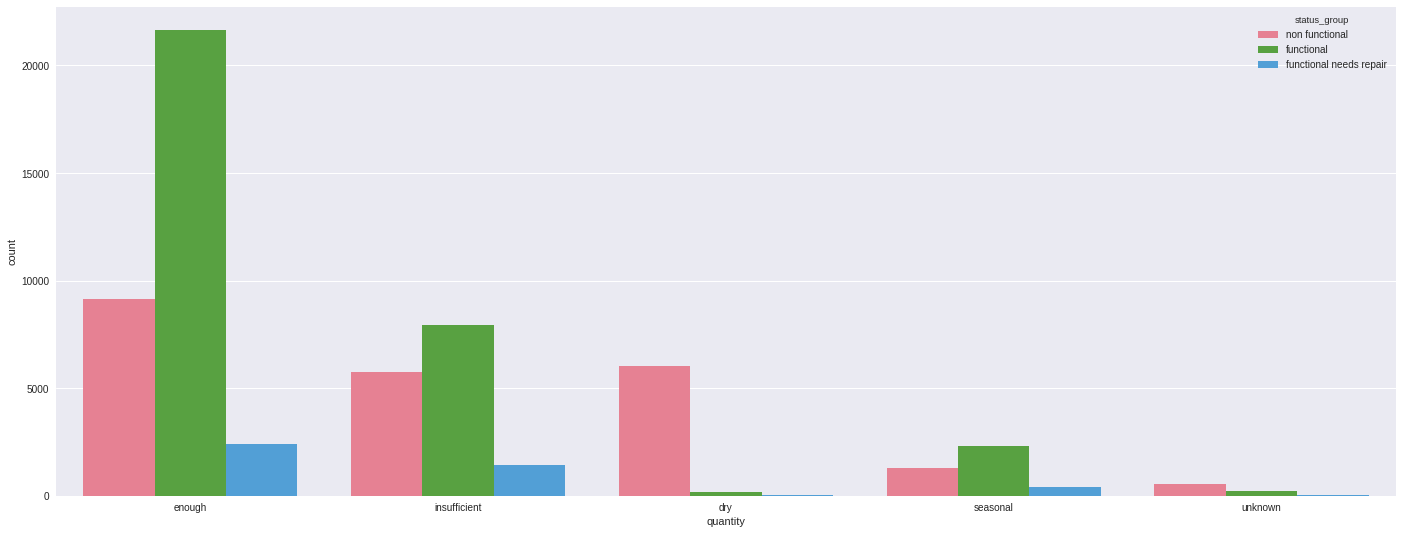

In [0]:
plt.figure(figsize=(24, 9))

sns.countplot(data=train_data,x='quantity',hue='status_group', palette = 'husl')

### Countplot of Public Meeting

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


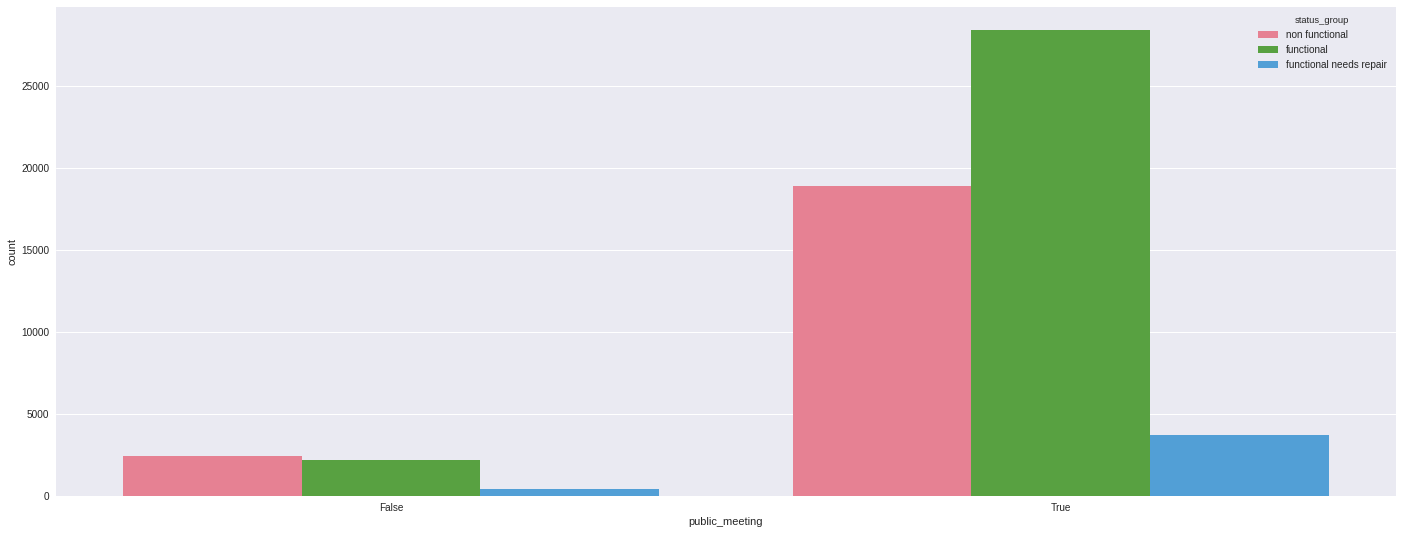

In [0]:
plt.figure(figsize=(24, 9))

sns.countplot(data=train_data,x='public_meeting',hue='status_group', palette = 'husl')

### FacetGrid w/ KDE of GPS Height

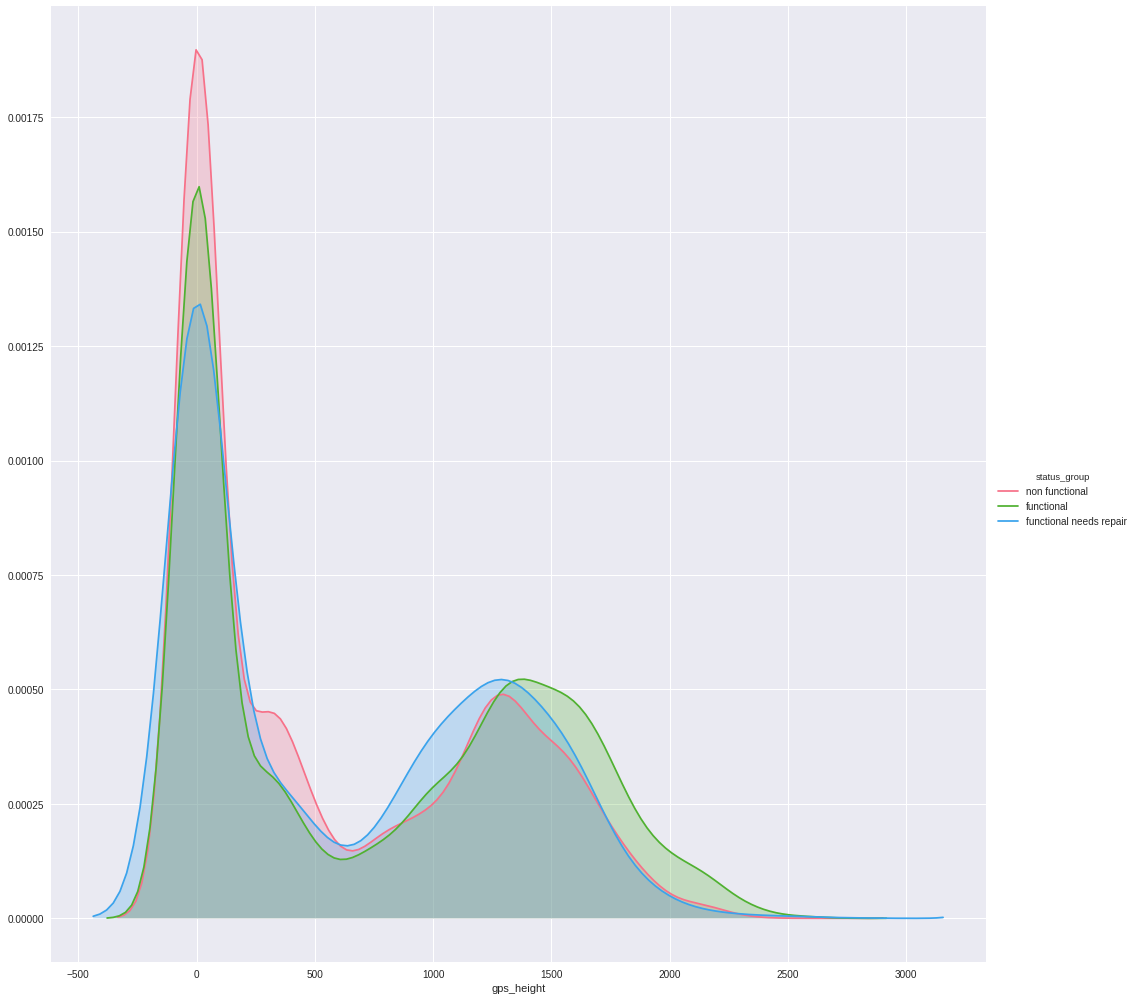

In [0]:
(sns
  .FacetGrid(train_data, 
             hue='status_group',size=14, palette = 'husl')
  .map(sns.kdeplot, 'gps_height', shade=True, )
 .add_legend()
)


### FacetGrid w/ KDE of Num Private

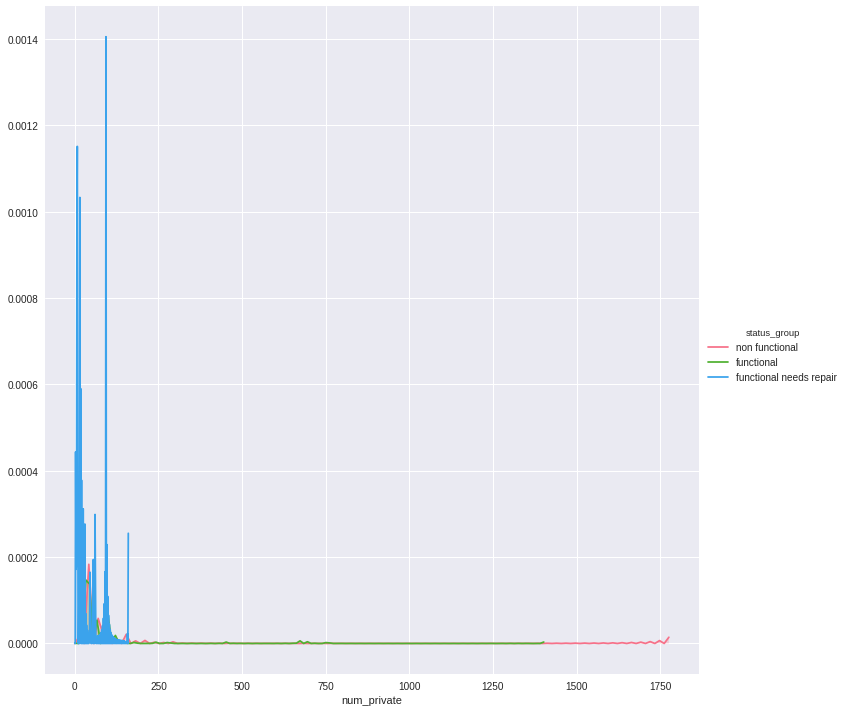

In [0]:


(sns
  .FacetGrid(train_data, 
             hue='status_group',size=10, palette = 'husl')
  .map(sns.kdeplot, 'num_private', shade=True)
 .add_legend()
)

### FacetGrid w/ KDE of Latitude

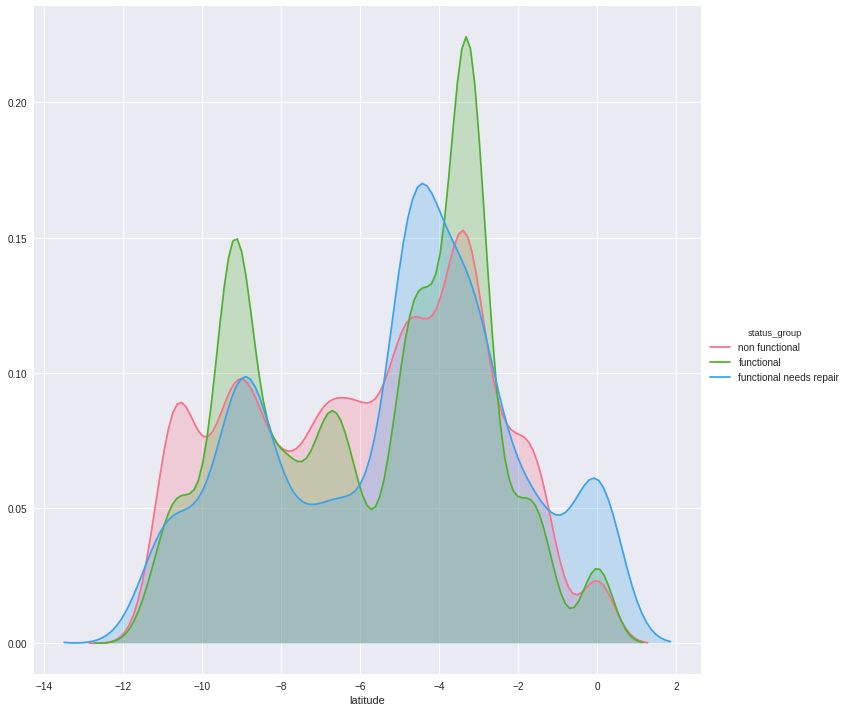

In [0]:
(sns
  .FacetGrid(train_data, 
             hue='status_group',size=10, palette = 'husl')
  .map(sns.kdeplot, 'latitude', shade=True)
 .add_legend()
)

### FacetGrid w/ KDE of Longitude

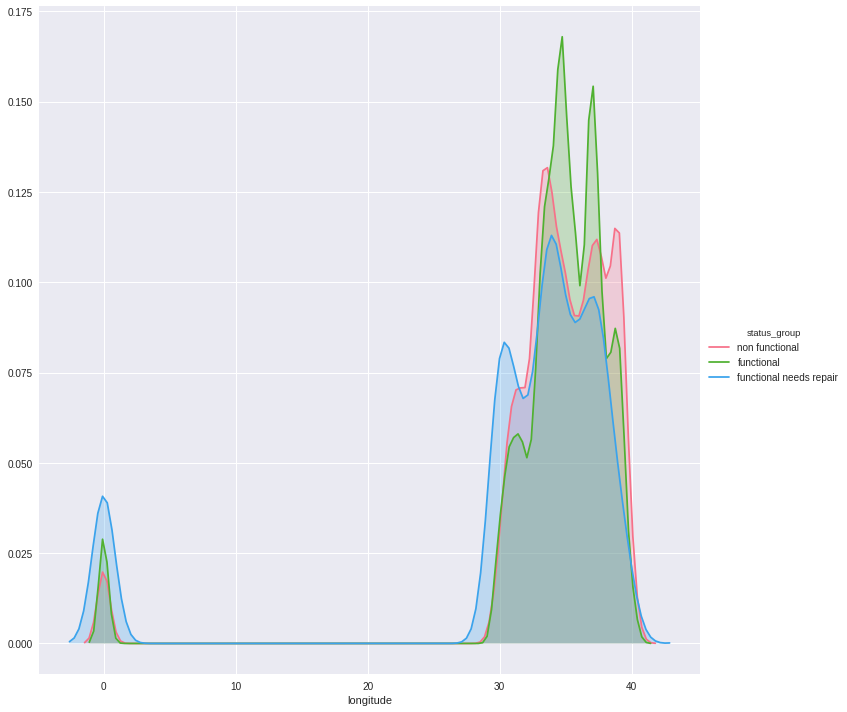

In [0]:
(sns
  .FacetGrid(train_data, 
             hue='status_group',size=10, palette = 'husl')
  .map(sns.kdeplot, 'longitude', shade=True)
 .add_legend()
)

### FacetGrid w/ KDE of Amount

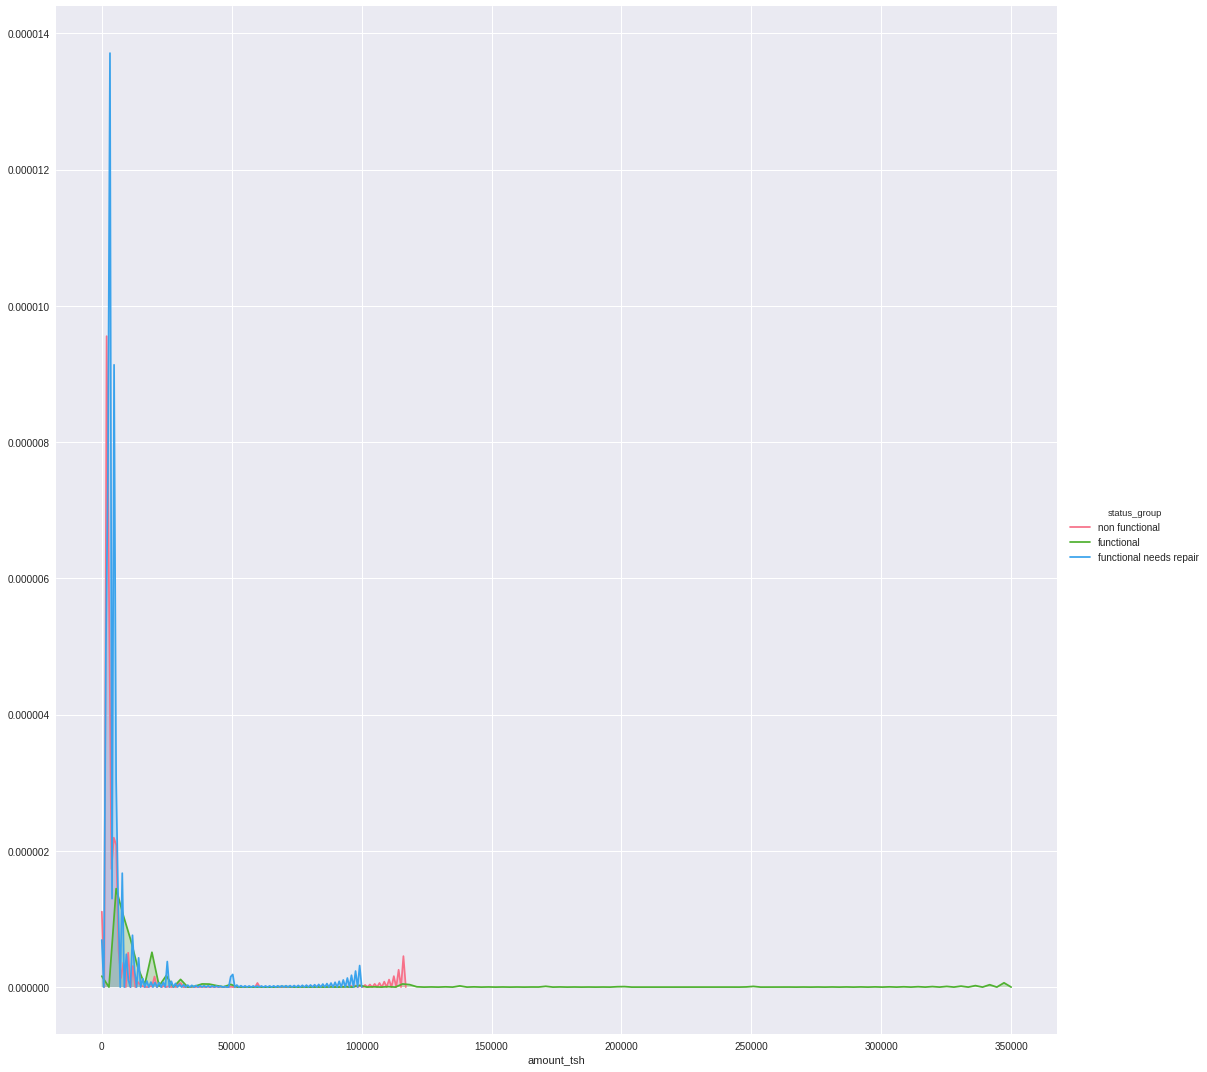

In [0]:
(sns
  .FacetGrid(train_data, 
             hue='status_group',size=15, palette = 'husl')
  .map(sns.kdeplot, 'amount_tsh', shade=True)
 .add_legend()
)

### Countplot of Source

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


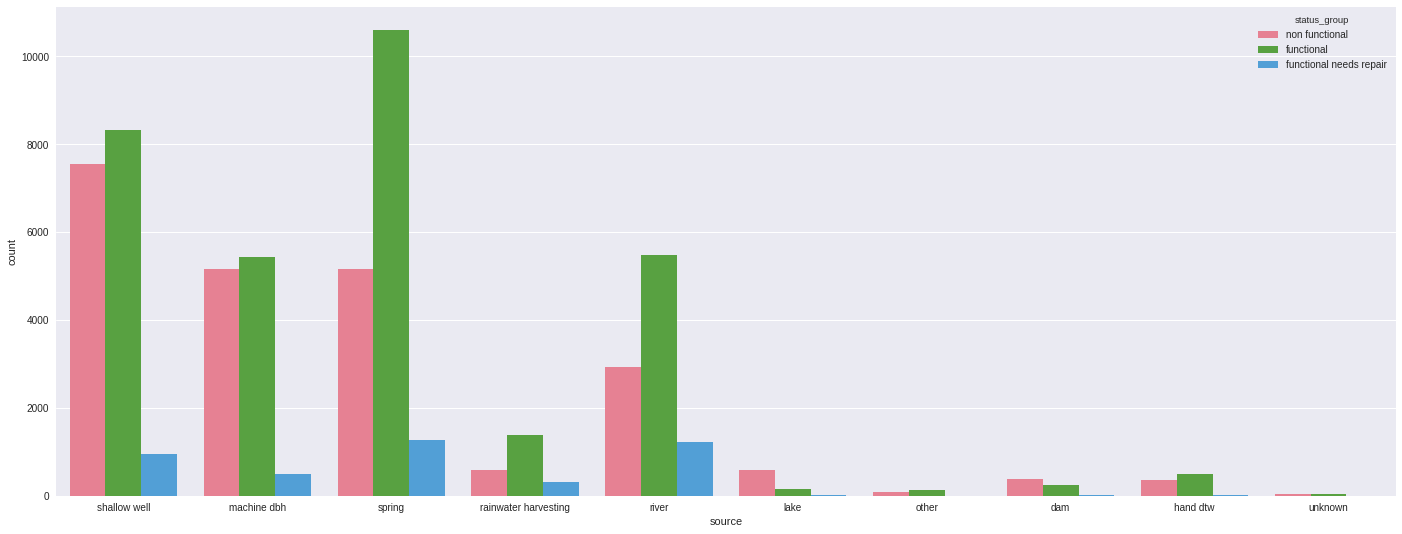

In [0]:
plt.figure(figsize=(24, 9))

sns.countplot(data=train_data,x='source',hue='status_group', palette = 'husl')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


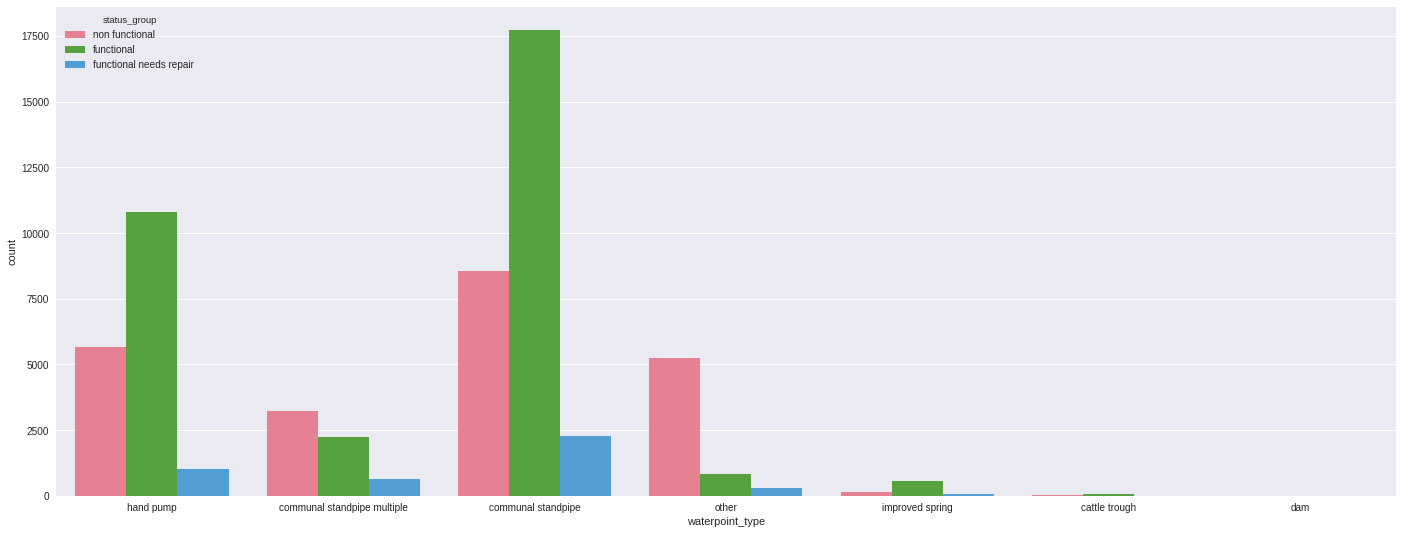

In [0]:
plt.figure(figsize=(24, 9))

sns.countplot(data=train_data,x='waterpoint_type',hue='status_group', palette = 'husl')

### Countplot of Extraction Type

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


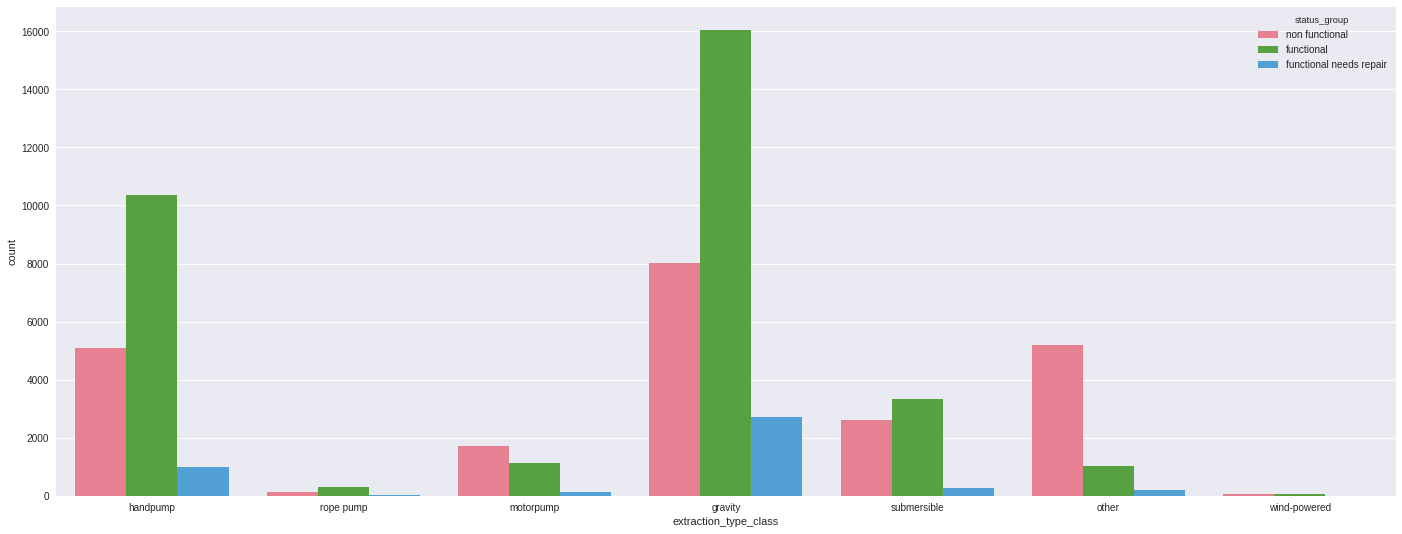

In [0]:
plt.figure(figsize=(24, 9))

sns.countplot(data=train_data,x='extraction_type_class',hue='status_group', palette = 'husl')

### Countplot of Waterpoint Type

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


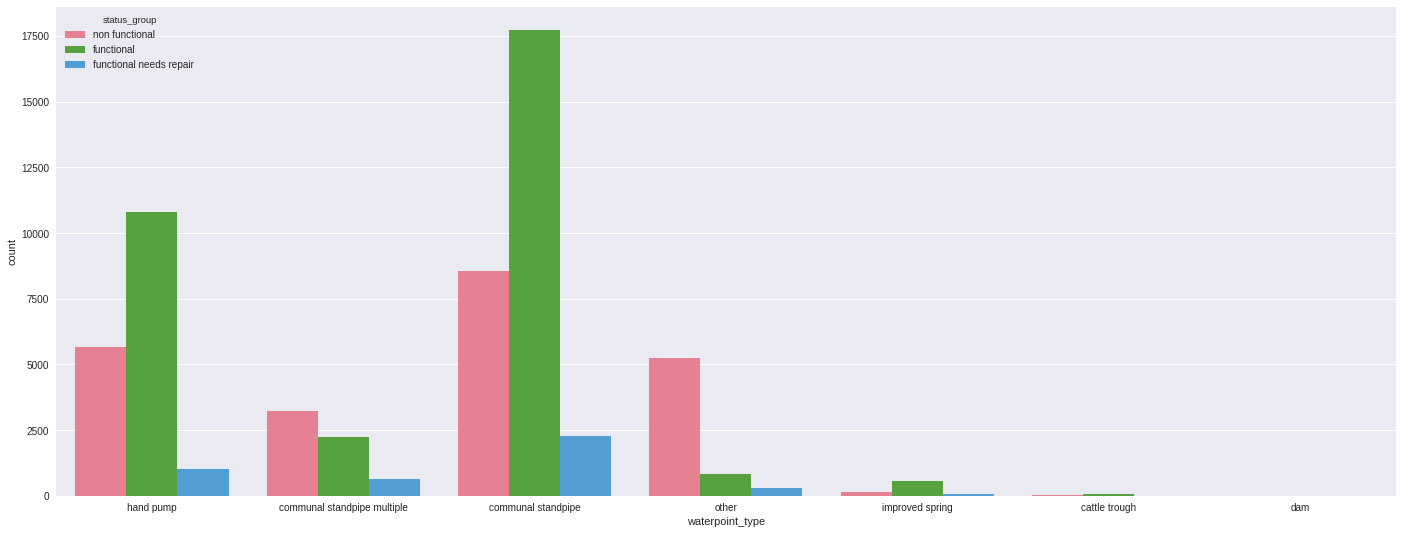

In [0]:
plt.figure(figsize=(24, 9))

sns.countplot(data=train_data,x='waterpoint_type',hue='status_group', palette = 'husl')

### Countplot of Payment Type

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


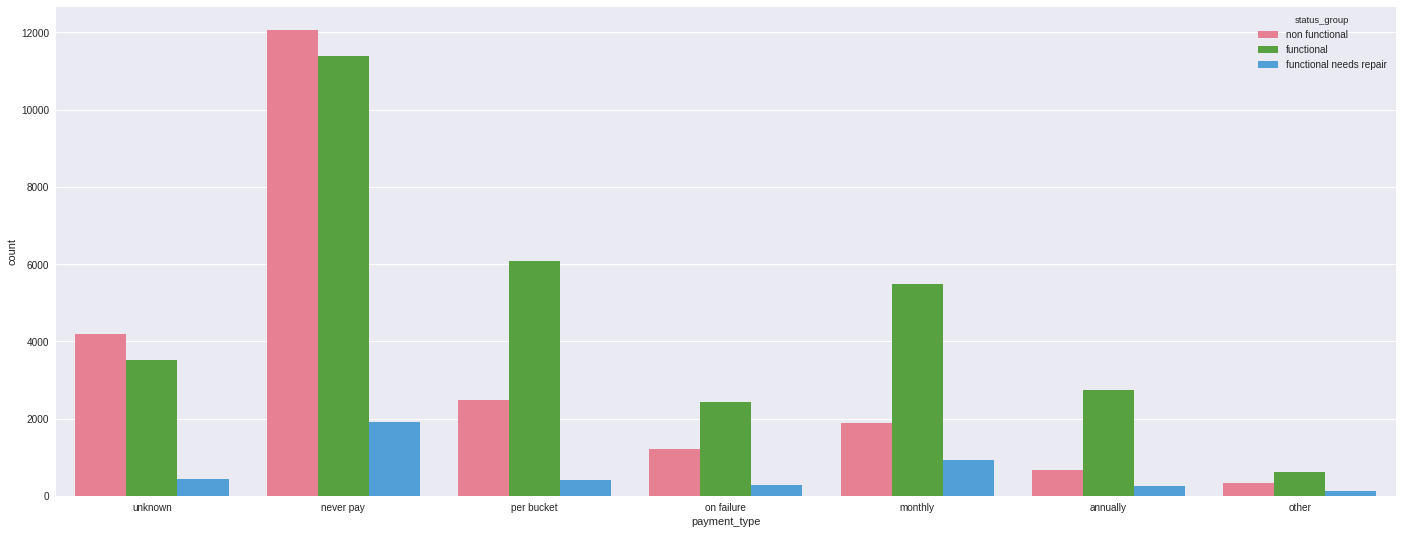

In [0]:
plt.figure(figsize=(24, 9))
sns.countplot(data=train_data,x='payment_type',hue='status_group', palette = 'husl')

# Data Wranglin


In [0]:
#Change date column into a special pandas date type specifically for dates
train_data['date_recorded']=train_data.date_recorded.apply(pd.to_datetime)

In [0]:
#If we look for the max date, we can find the oldest date
train_data['date_recorded'].max()

Timestamp('2013-12-03 00:00:00')

In [0]:
# Merge all the data into one dataframe for cleaning and feature engineering
combined_df=train_value.append(test)


In [0]:
combined_df.info() #A lot of objects....rip

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73758 entries, 0 to 14357
Data columns (total 40 columns):
id                       73758 non-null int64
amount_tsh               73758 non-null float64
date_recorded            73758 non-null object
funder                   69340 non-null object
gps_height               73758 non-null int64
installer                69315 non-null object
longitude                73758 non-null float64
latitude                 73758 non-null float64
wpt_name                 73758 non-null object
num_private              73758 non-null int64
basin                    73758 non-null object
subvillage               73293 non-null object
region                   73758 non-null object
region_code              73758 non-null int64
district_code            73758 non-null int64
lga                      73758 non-null object
ward                     73758 non-null object
population               73758 non-null int64
public_meeting           69639 non-null object
r

## Missing Values

### Construction Year

In [0]:
#Replace na with 1950 
combined_df.construction_year=pd.to_numeric(combined_df.construction_year)
combined_df.loc[combined_df.construction_year <= 0, combined_df.columns=='construction_year'] = 1950

### Latitude and Longitude

In [0]:
#Funky stuff going on with latitude and longitude being negative, lets consider those as nulls
a= combined_df[combined_df["longitude"] < 1]
a.iloc[:,combined_df.columns == "latitude"]= np.nan
a.iloc[:,combined_df.columns == "longitude"]= np.nan
combined_df[combined_df["longitude"] < 1] = a

#Replace with the mean of the 'region_code' feature 
combined_df["longitude"] = combined_df.groupby("region_code").transform(lambda x: x.fillna(x.mean())).longitude
combined_df["latitude"] = combined_df.groupby("region_code").transform(lambda x: x.fillna(x.mean())).latitude



### GPS Height

In [0]:
#Funky stuff going on with some GPS height being negative as well, lets consider those as nulls

a= combined_df[combined_df["gps_height"] < 1]
a.iloc[:,combined_df.columns == "gps_height"]= np.nan
combined_df[combined_df["gps_height"] < 1] = a
combined_df["gps_height"] = combined_df.groupby("region_code").transform(lambda x: x.fillna(x.mean())).gps_height

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
#Let's be lazy now, just fill with the mean
combined_df=combined_df.fillna(combined_df.mean())

# Feature Engineering

## Distance 

In [0]:
#The distance between the wells is significant because if there is only one well in a large area, it more likely to be a problem, and get fixed
distances = combined_df[['id','longitude','latitude']]
distances =distances.sort_values(by=['longitude','latitude'])
distances['coords']=distances[['longitude','latitude']].values.tolist()

In [0]:
#Usually shift is for timeseries, but here we can use shift to actually compare the distance between wells. Neat! 
shift_distances=distances.shift(1).loc[:,'coords' ]
distances_2 = pd.concat([distances, shift_distances], axis=1)
distances_2.columns =['id','longitude','latitude','coord_1','coords_2']
distances_2['long2']=pd.to_numeric(distances_2['coords_2'].str[0])
distances_2['lat2']=pd.to_numeric(distances_2['coords_2'].str[1])
distances_2=distances_2.fillna(0)

In [0]:
#This is a fun function that will represent the distance between one long/lat combo and another long/lat combo
def haversine_np(lon1, lat1, lon2, lat2): 
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [0]:
#Add the new distances
distances_2['dist'] = distances_2.apply(lambda x: haversine_np(x[1], x[2], x[5], x[6]), axis = 1)
location=distances_2[['id','dist']]
combined_df=combined_df.merge(location, left_on='id', right_on='id', how='inner')

## Date and Age

In [0]:
#Earlier we looked at max date, but if we use current date, we can create some new useful features that tell us how old a well is, as we can assume new wells are more likely to work
combined_df['Current_Date']='2014-01-01'

#Operation_time, represents the gap in time between the current date and the last recorded date
combined_df['operation_time']=combined_df.Current_Date.apply(pd.to_datetime)-combined_df.date_recorded.apply(pd.to_datetime)
combined_df['operation_time']= combined_df.operation_time.astype('timedelta64[D]').astype(int)

#We can also take the month so see if seasons or months have an impact
combined_df['month']=pd.to_datetime(combined_df.date_recorded).dt.month

#How old is the well?
combined_df['age']=combined_df.Current_Date.apply(pd.to_datetime)-combined_df.construction_year.apply(lambda x: pd.to_datetime(x,format='%Y'))
combined_df['age']= combined_df.age.astype('timedelta64[Y]').astype(int)

## Sparse Data

In [0]:
#A lot of features need to be manipulated because of the lack of variety in the data. Not enough frequency.... 
factorschange=[x for x in combined_df.columns if x not in ['id','latitude','longitude','gps_height','date_recorded','construction_year','month','operation_time','dist']]
#For loop that keeps values that appear often and bins the rest into other
for factor in factorschange:


    values_factor=combined_df[factor].value_counts()
    lessthen=values_factor[values_factor < 20]
    listnow=combined_df.installer.isin(list(lessthen.keys()))
    combined_df.loc[listnow,factor] = 'Others'

    # Our models won't like strings, lets turn them into something more palatable with Label Encoder
    combined_df[factor] = preprocessing.LabelEncoder().fit_transform(combined_df[factor].astype(str))

## Logging

In [0]:
#If we learned one thing during regression week, it was, always log!
combined_df.population = combined_df.population.apply(lambda x: np.log10(x+1))

# Test and Train sets

In [0]:
#Now that our data is clean, lets seperate it again for train test sets
training_set=combined_df[:len(train_value)] 

In [0]:
test_set=combined_df[len(train_value):]

## Features for model

In [0]:
#we will be using all the features that appear often and have a good variety of data


factors=[u'funder', u'gps_height',
       u'installer', u'longitude', u'latitude', u'wpt_name',
       u'basin', u'subvillage', u'region', u'region_code', u'district_code',
       u'lga', u'ward', u'population', u'public_meeting',
       u'scheme_management', u'scheme_name', u'permit', u'construction_year',
       u'extraction_type', u'extraction_type_group', u'extraction_type_class',
       u'management', u'management_group', u'payment', u'payment_type',
       u'water_quality', u'quality_group', u'quantity', u'quantity_group',
       u'source', u'source_type', u'source_class', u'waterpoint_type',
       u'waterpoint_type_group','month','operation_time','age']

#Split it! random state 42 of course, we're going to use a tiny test size as well
X_train, X_test, y_train, y_test = train_test_split(training_set[factors], train_label.status_group, test_size=0.1, random_state=42)

#Just to check
print (len(X_train), len(X_test))

53460 5940


# Modeling

## Train and Score Models

Random Forest 0.8107744107744108
Decision Tree 0.6708754208754208
Extra Trees Classifiers 0.7983164983164983
XGboost Classifiers 0.8111111111111111


Text(0, 0.5, 'Score')

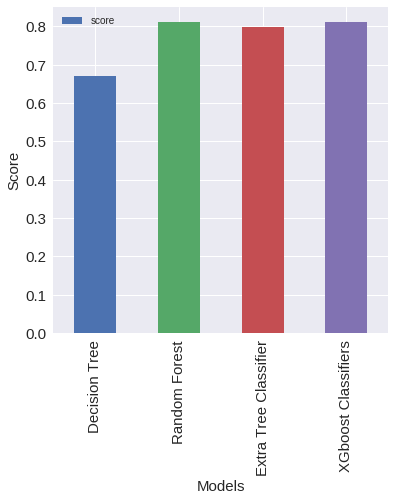

In [0]:
#We're going to build 4 models here, and the best two models get to move onto the next phase

#Random Forest
modelRFC = RandomForestClassifier(n_estimators=1000,min_samples_split=16,bootstrap=True)


X_test=(X_test - X_test.min())/(X_test.max() - X_test.min())
X_train=(X_train - X_train.min())/(X_train.max() - X_train.min())

modelRFC.fit(X_train, y_train)

#Extra Trees Classifier
modelETC = ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=32,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, verbose=0, warm_start=False)
modelETC.fit(X_train, y_train)

#XGBoost
modelXclass = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx', 
                      num_class = 4, maximize = False, eval_metric = 'merror', eta = .2,
                      max_depth = 16, colsample_bytree = .4)  
                            
modelXclass.fit(X_train, y_train)  
 
#Decicition Tree
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

#Who will win??
scoreRFC= modelRFC.score(X_test,y_test)
scoreDTC= modelDTC.score(X_test,y_test)
scoreETC= modelETC.score(X_test,y_test)
scoreXclass= modelXclass.score(X_test,y_test)

print ('Random Forest' ,scoreRFC)
print ('Decision Tree', scoreDTC)
print ('Extra Trees Classifiers', scoreETC)
print ('XGboost Classifiers', scoreXclass)

#Plot a chart to see how the models compare...ETC and RFC win!
pd.DataFrame([
    ("Decision Tree", scoreDTC),
    ("Random Forest", scoreRFC),
    ("Extra Tree Classifier", scoreETC),
    ("XGboost Classifiers", scoreXclass),
    ], columns=["Model", "score"]).plot(x="Model", y="score", kind="Bar", fontsize=15)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Score', fontsize=15)

## Confusion Matrix

Confusion matrix, without normalization
[[2965   19  213]
 [ 283   87   55]
 [ 608   15 1695]]
Normalized confusion matrix
[[0.93 0.01 0.07]
 [0.67 0.2  0.13]
 [0.26 0.01 0.73]]


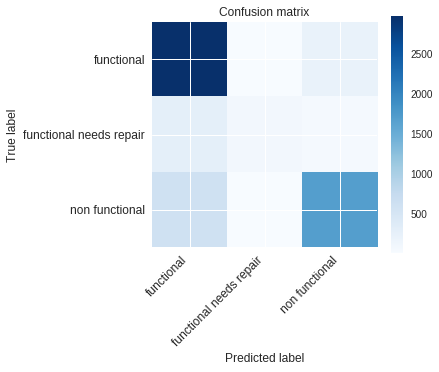

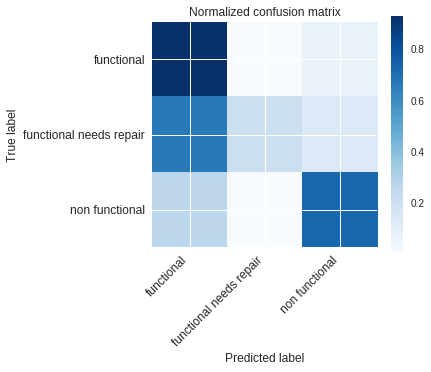

Test Score 0.7991582491582492


In [0]:
#Hack to make sure all our figures show up
plt.rcParams['figure.figsize'] = (6.0, 6.0)

from sklearn.metrics import confusion_matrix
labels=['functional','functional needs repair','non functional']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, ha='right', fontsize=12)
    plt.yticks(tick_marks, labels , fontsize=12)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)


# Calculate and plot a confusion matrix
cm = confusion_matrix(y_test, modelETC.predict(X_test))
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

#Normalize the matrix based on frequncy of data
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

#How we looking?
plt.show()
print ('Test Score', cm.diagonal().sum()/float(cm.sum()))

Confusion matrix, without normalization
[[3017   19  232]
 [ 261   93   58]
 [ 530   23 1707]]
Normalized confusion matrix
[[0.92 0.01 0.07]
 [0.63 0.23 0.14]
 [0.23 0.01 0.76]]


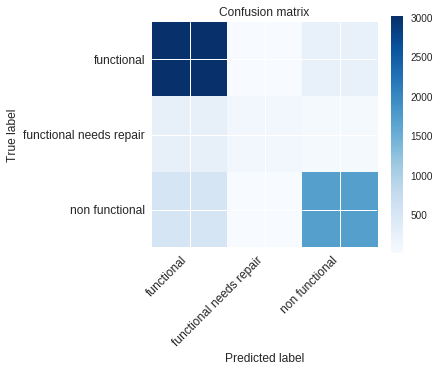

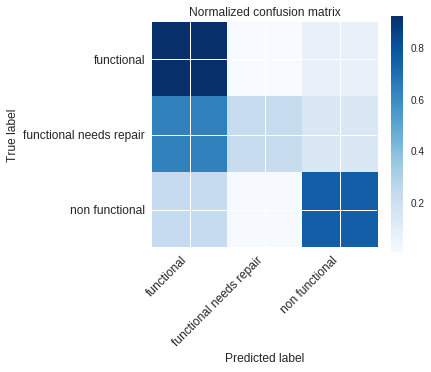

Test Score 0.810942760942761


In [0]:
#Do it again for the RFC

plt.rcParams['figure.figsize'] = (6.0, 6.0)

from sklearn.metrics import confusion_matrix
labels=['functional','functional needs repair','non functional']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, ha='right', fontsize=12)
    plt.yticks(tick_marks, labels , fontsize=12)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)


# Compute confusion matrix
cm = confusion_matrix(y_test, modelRFC.predict(X_test))
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
print ('Test Score', cm.diagonal().sum()/float(cm.sum()))

# Please improve!

In [0]:
#Run the model on the entire training set, drum rollllllllllllll

model=modelETC

X_train=training_set[factors]
y_train =train_label.status_group
X_train=(X_train - X_train.min())/(X_train.max() - X_train.min())

model.fit(X_train, y_train)



X_topredict=test_set[factors]
X_topredict=(X_topredict - X_topredict.min())/(X_topredict.max() - X_topredict.min())
predict=model.predict(X_topredict)


test_set['status_group']=predict

test_set[['id','status_group']].to_csv('heyo7.csv',index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
